## Testing percentage of Brand

In [1]:
import json

In [23]:
with open("clean/kettlebells_unique_clean.json", "r") as f:
    data = json.load(f)
data

[{'asin': 'B005L9VAOU',
  'title': "Ader Pro-grade Int'l Kettlebell Set w/DVD & 2 Racks- (8,12,16,20,24,28,32,36,40,44,48kg pairs)",
  'price': 4590.2,
  'brand': 'Ader Sporting Goods',
  'thumbnailImage': 'https://m.media-amazon.com/images/I/617yVIUnkIL.__AC_SX300_SY300_QL70_ML2_.jpg',
  'galleryThumbnails': ['https://m.media-amazon.com/images/I/51dR85UxEaL._AC_US.jpg',
   'https://m.media-amazon.com/images/I/41enbjYp97L._AC_US.jpg',
   'https://m.media-amazon.com/images/I/314lE3vhEHL._AC_US.jpg',
   'https://m.media-amazon.com/images/I/41ctRPaJW-L._AC_US.jpg',
   'https://m.media-amazon.com/images/I/51TuJKX5JjL._AC_US.jpg'],
  'description': None,
  'features': ['8kg/18lb, 12kg/26lb, 16kg/35lb, 20kg/44lb, 24kg/53lb, 28kg/62lb, 32kg/70lb, 36kg/80lb, 40kg/88lb, 44kg/97lb, 48kg/106lb (color may vary)',
   '11 Pairs of Competition style kettlebells',
   'With Lisa Schaffer\'s "Kettlebell Basics" DVD',
   '2 Kettlebell racks',
   'NO shipping to Alaska, Hawaii, or APO/FPO addresses or PO 

In [13]:
all_record = len(data)
have_brand_attribute = 0
no_brand_attribute_but_have
nope_dat = []
count = 0
for dat in data:
    if not dat.get("attributes"):
        nope_dat.append(dat)
        continue
    
    for each_attribute in dat["attributes"]:
        if each_attribute["key"] == "Brand":
            count += 1
            break
    else:
        nope_dat.append(dat)

print(f"found Brand {count} from {all_record}")
print(f"{count/all_record*100:.2f}%")

found Brand 88 from 100
88.00%


In [14]:
nope_dat

[{'asin': 'B0D6YZFR8X',
  'title': 'Dumb-bells, Workout Dumbbell Hand Weight, Alloy Steel Hexagon Dumbbell',
  'price': 26.99,
  'brand': 'XIYUYEU',
  'thumbnailImage': 'https://m.media-amazon.com/images/I/81l5mIwM3QL.__AC_SX300_SY300_QL70_ML2_.jpg',
  'galleryThumbnails': ['https://m.media-amazon.com/images/I/41O-3N3Kv0L._AC_US.jpg',
   'https://m.media-amazon.com/images/I/41QsKKPQlLL._AC_US.jpg',
   'https://m.media-amazon.com/images/I/41X-h1yEtUL._AC_US.jpg',
   'https://m.media-amazon.com/images/I/41bNbLQh4ZL._AC_US.jpg'],
  'description': 'For exercise and strength training. Hexagon shaped ends prevent rolling away and offer stay-in-place storage. Non-slip grip and contoured handle ensure a secure, comfortable hold.',
  'features': ['For exercise and strength training.',
   'Hexagon shaped ends prevent rolling away and offer stay-in-place storage.',
   'Non-slip grip and contoured handle ensure a secure, comfortable hold.'],
  'attributes': [{'key': 'Brand Name', 'value': 'XIYUYEU

In [25]:

# Initialize Counters and Lists
all_record = len(data)

category1 = []  # Have 'brand' in JSON but not 'Brand' in attributes
category2 = []  # Do not have 'brand' in JSON but have 'Brand' in attributes
category3 = []  # Have 'brand' in JSON and have 'Brand' in attributes
category4 = []  # Do not have 'brand' in JSON and do not have 'Brand' in attributes
category5 = []

# Iterate Through Each Record
for dat in data:
    has_brand_json = "brand" in dat
    has_attributes = dat.get("attributes") is not None and isinstance(dat["attributes"], list)
    has_brand_attribute = False

    if has_attributes:
        for each_attribute in dat["attributes"]:
            if each_attribute.get("key") == "Brand":
                has_brand_attribute = True
                break
    if has_brand_json:
        category5.append(dat)

    # Classification Logic
    if has_brand_json and not has_brand_attribute:
        category1.append(dat)
    elif not has_brand_json and has_brand_attribute:
        category2.append(dat)
    elif has_brand_json and has_brand_attribute:
        category3.append(dat)
    else:
        category4.append(dat)

def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

category1_percent = calculate_percentage(len(category1), all_record)
category2_percent = calculate_percentage(len(category2), all_record)
category3_percent = calculate_percentage(len(category3), all_record)
category4_percent = calculate_percentage(len(category4), all_record)
category5_percent = calculate_percentage(len(category5), all_record)


# Prepare Analytics Report
analytics_report = {
    "Category 1": {
        "Description": "Have 'brand' in JSON but do not have 'Brand' in attributes",
        "Count": len(category1),
        "Percentage": f"{category1_percent:.2f}%"
    },
    "Category 2": {
        "Description": "Do not have 'brand' in JSON but have 'Brand' in attributes",
        "Count": len(category2),
        "Percentage": f"{category2_percent:.2f}%"
    },
    "Category 3": {
        "Description": "Have 'brand' in JSON and have 'Brand' in attributes",
        "Count": len(category3),
        "Percentage": f"{category3_percent:.2f}%"
    },
    "Category 4": {
        "Description": "Do not have 'brand' in JSON and do not have 'Brand' in attributes",
        "Count": len(category4),
        "Percentage": f"{category4_percent:.2f}%"
    },
    "Category 5": {
        "Description": "have 'brand' in JSON ",
        "Count": len(category5),
        "Percentage": f"{category5_percent:.2f}%"
    },
    "Total Records": all_record
}

# Display Analytics Report
print("=== Analytics Report ===\n")
print(f"Total Records: {analytics_report['Total Records']}\n")

for category, details in analytics_report.items():
    if category == "Total Records":
        continue
    print(f"{category}: {details['Description']}")
    print(f" - Count: {details['Count']}")
    print(f" - Percentage: {details['Percentage']}\n")

=== Analytics Report ===

Total Records: 75

Category 1: Have 'brand' in JSON but do not have 'Brand' in attributes
 - Count: 27
 - Percentage: 36.00%

Category 2: Do not have 'brand' in JSON but have 'Brand' in attributes
 - Count: 0
 - Percentage: 0.00%

Category 3: Have 'brand' in JSON and have 'Brand' in attributes
 - Count: 48
 - Percentage: 64.00%

Category 4: Do not have 'brand' in JSON and do not have 'Brand' in attributes
 - Count: 0
 - Percentage: 0.00%

Category 5: have 'brand' in JSON 
 - Count: 75
 - Percentage: 100.00%



### its mean that brand in in json lets explore and analyze all file

In [26]:
pip install pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 33.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


=== Aggregated Analytics Data ===

                                         File  Total Records  Category 1  \
0        calf_raise_machine_unique_clean.json            100       70.00   
1            medicine_balls_unique_clean.json            100       24.00   
2     leg_extension_machine_unique_clean.json            100       74.00   
3           stationary_bike_unique_clean.json            144       15.97   
4          leg_curl_machine_unique_clean.json            100       74.00   
5            cable_machines_unique_clean.json            100       80.00   
6                elliptical_unique_clean.json            100       18.00   
7              battle_ropes_unique_clean.json            100       45.00   
8      lat_pulldown_machine_unique_clean.json            100       82.00   
9        seated_row_machine_unique_clean.json            100       35.00   
10                treadmill_unique_clean.json            100       10.00   
11              kettlebells_unique_clean.json        

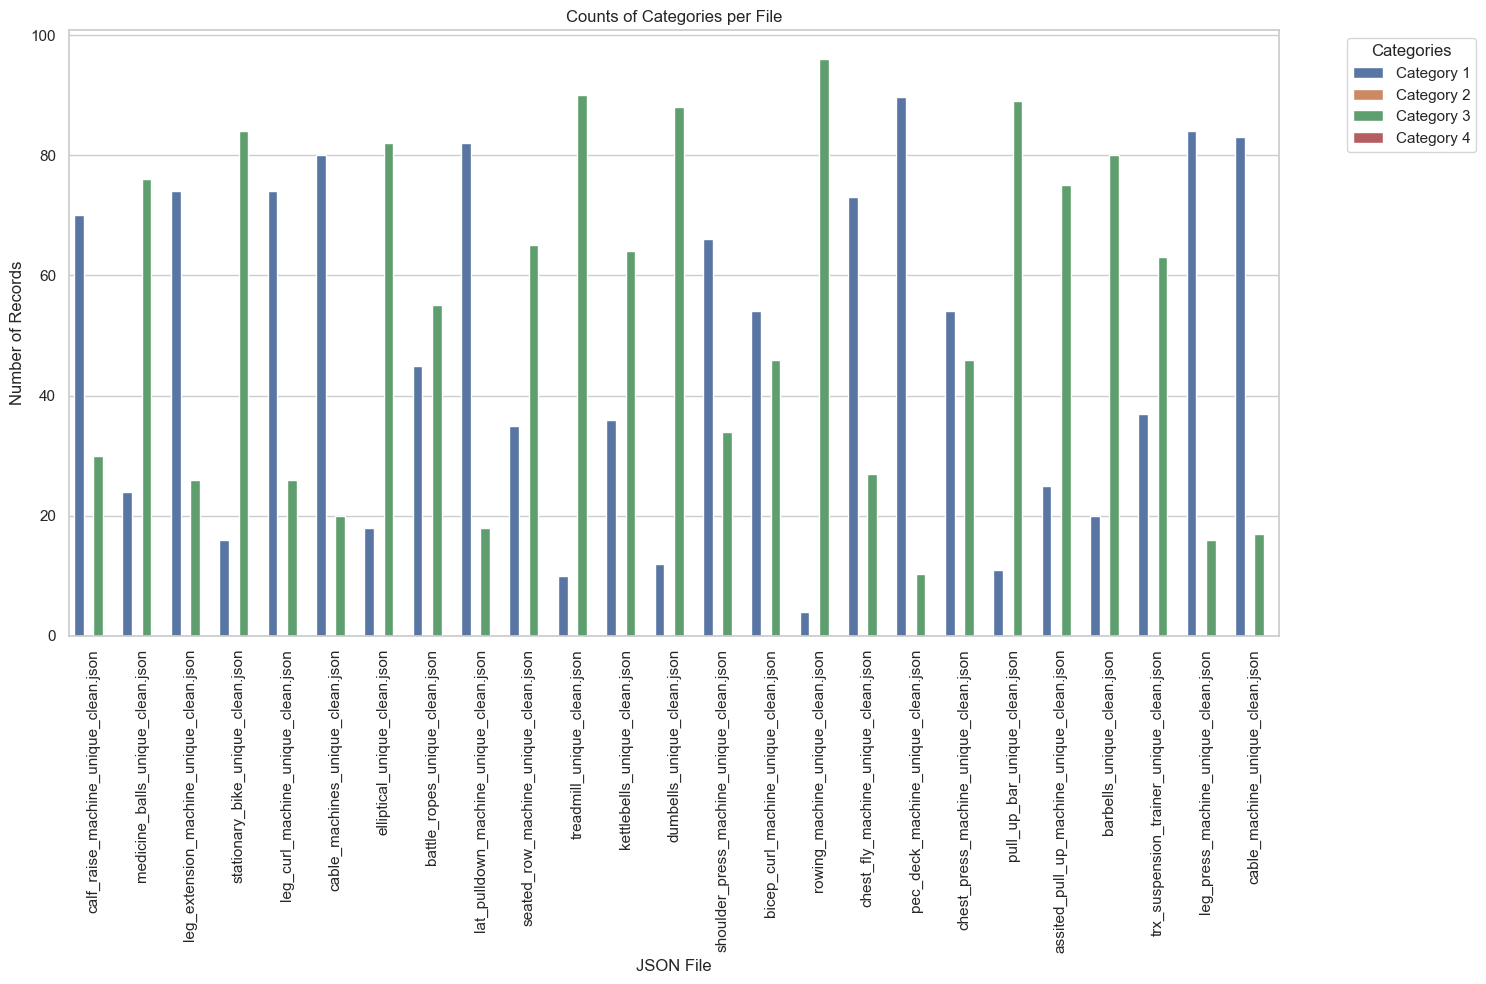

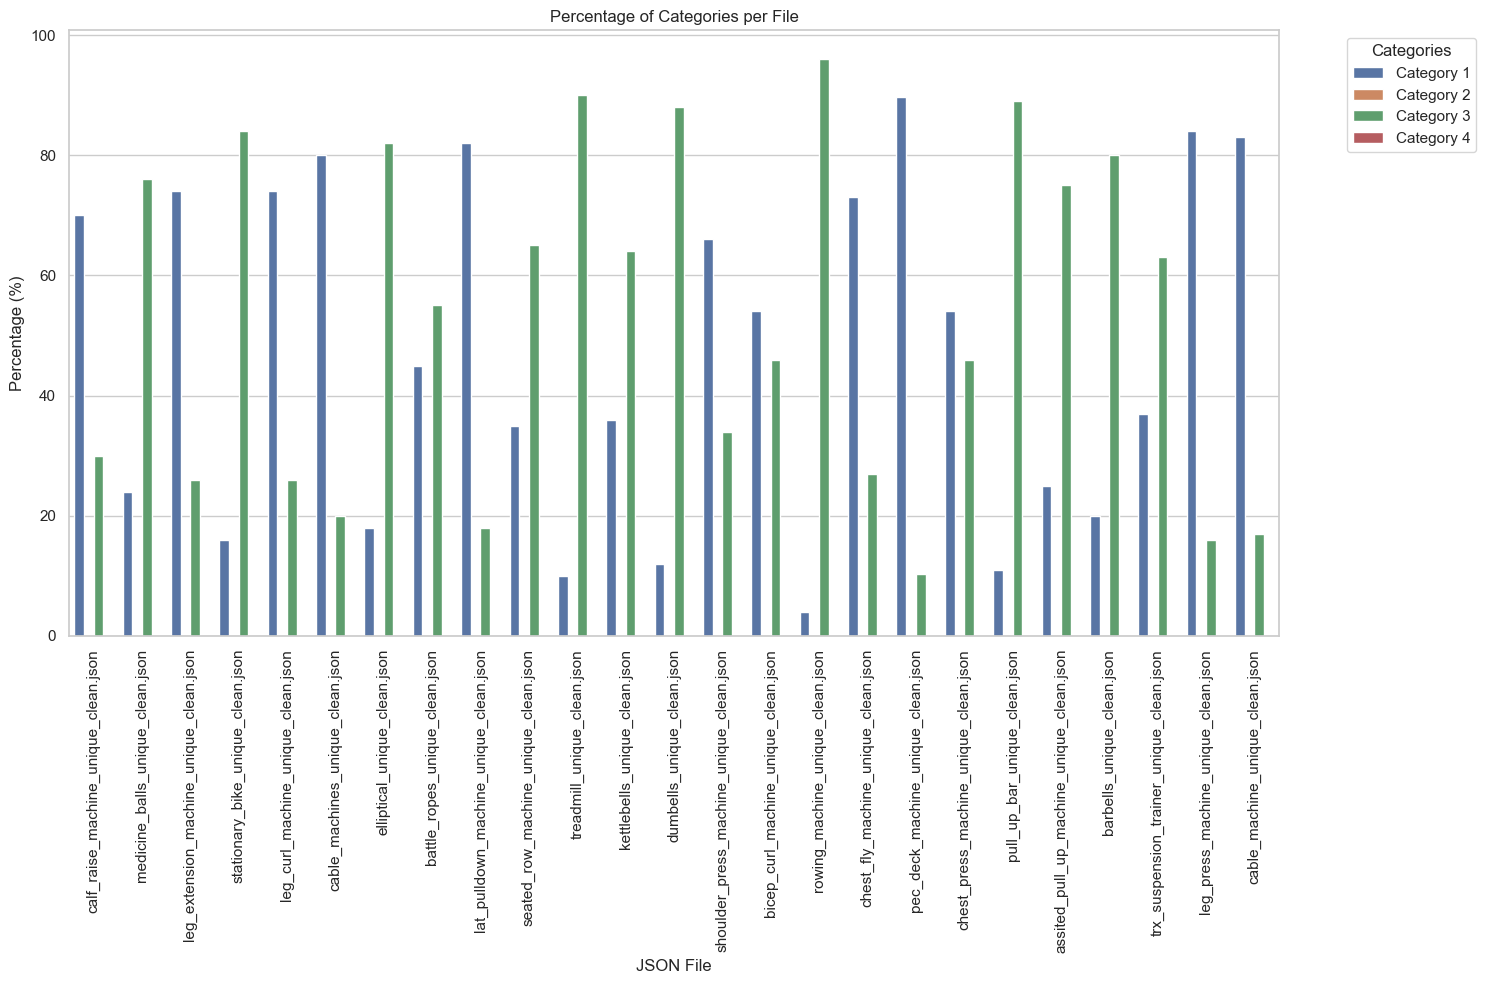

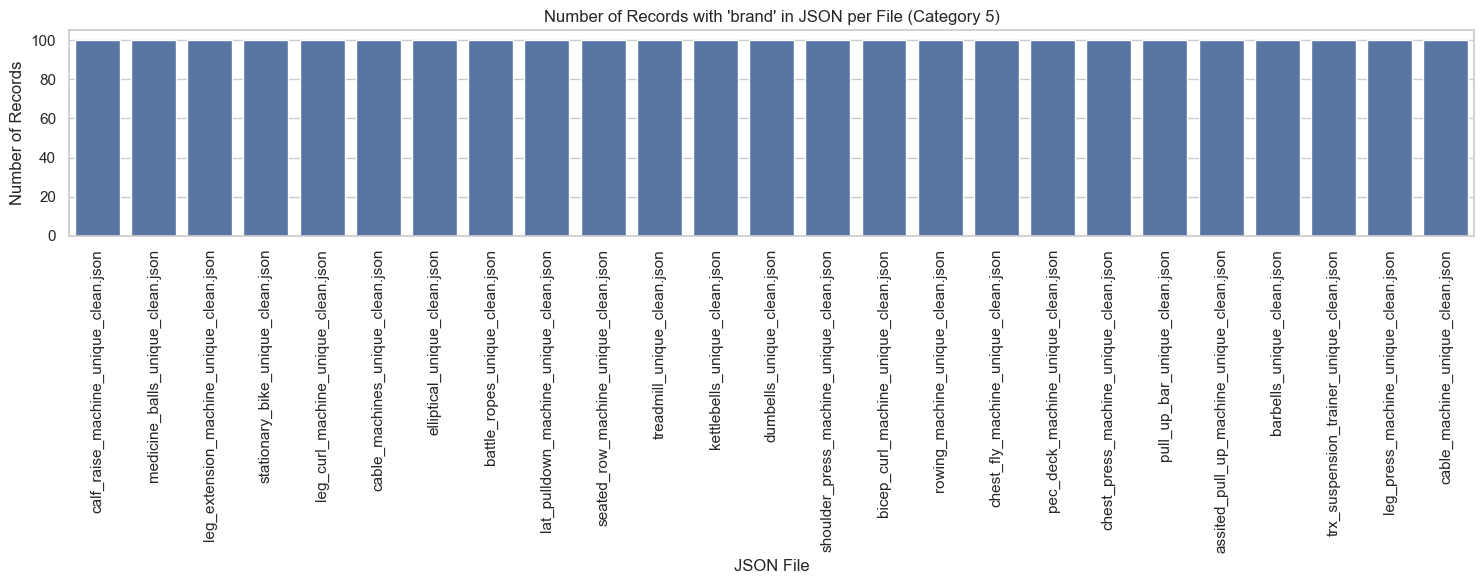


Analytics report saved to 'analytics_report.csv'.


In [27]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Define the directory containing the JSON files
CLEAN_DIR = "clean"

# Define the classification categories
CATEGORIES = {
    "Category 1": "Have 'brand' in JSON but do not have 'Brand' in attributes",
    "Category 2": "Do not have 'brand' in JSON but have 'Brand' in attributes",
    "Category 3": "Have 'brand' in JSON and have 'Brand' in attributes",
    "Category 4": "Do not have 'brand' in JSON and do not have 'Brand' in attributes",
    "Category 5": "Have 'brand' in JSON"
}

def calculate_percentage(count, total):
    """Calculate percentage with two decimal places."""
    return round((count / total) * 100, 2) if total > 0 else 0.0

def classify_records(data):
    """
    Classify records into defined categories based on 'brand' in JSON and 'Brand' attribute.
    
    Returns:
        A dictionary with category names as keys and counts as values.
    """
    # Initialize Counters
    counts = {
        "Category 1": 0,  # Have 'brand' in JSON but not 'Brand' in attributes
        "Category 2": 0,  # Do not have 'brand' in JSON but have 'Brand' in attributes
        "Category 3": 0,  # Have 'brand' in JSON and have 'Brand' in attributes
        "Category 4": 0,  # Do not have 'brand' in JSON and do not have 'Brand' in attributes
        "Category 5": 0   # Have 'brand' in JSON
    }
    
    for dat in data:
        has_brand_json = "brand" in dat
        has_attributes = isinstance(dat.get("attributes"), list)
        has_brand_attribute = False

        if has_attributes:
            for each_attribute in dat["attributes"]:
                if each_attribute.get("key") == "Brand":
                    has_brand_attribute = True
                    break
        
        # Increment Category 5 if 'brand' exists in JSON
        if has_brand_json:
            counts["Category 5"] += 1

        # Classification Logic
        if has_brand_json and not has_brand_attribute:
            counts["Category 1"] += 1
        elif not has_brand_json and has_brand_attribute:
            counts["Category 2"] += 1
        elif has_brand_json and has_brand_attribute:
            counts["Category 3"] += 1
        else:
            counts["Category 4"] += 1
    
    return counts

def process_all_files(clean_dir):
    """
    Process all JSON files in the specified directory and classify their records.
    
    Returns:
        A pandas DataFrame containing counts and percentages for each category per file.
    """
    # List to hold analytics data for each file
    analytics_data = []

    # Iterate through all JSON files in the directory
    for filename in os.listdir(clean_dir):
        if filename.endswith("_unique_clean.json"):
            filepath = os.path.join(clean_dir, filename)
            with open(filepath, "r") as f:
                try:
                    data = json.load(f)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {filename}: {e}")
                    continue

            total_records = len(data)
            counts = classify_records(data)
            
            # Calculate percentages
            percentages = {cat: calculate_percentage(count, total_records) for cat, count in counts.items()}

            # Append data to analytics_data list
            analytics_data.append({
                "File": filename,
                "Total Records": total_records,
                **counts,
                **percentages
            })
    
    # Convert to DataFrame
    df = pd.DataFrame(analytics_data)
    
    return df

def visualize_analytics(df):
    """
    Visualize the analytics DataFrame using bar charts.
    """
    # Set the figure size
    plt.figure(figsize=(15, 10))
    
    # Melt the DataFrame for easier plotting with seaborn
    df_melted = df.melt(id_vars=["File", "Total Records"], 
                        value_vars=["Category 1", "Category 2", "Category 3", "Category 4"],
                        var_name="Category", 
                        value_name="Count")
    
    # Merge descriptions
    descriptions = pd.DataFrame([
        {"Category": "Category 1", "Description": CATEGORIES["Category 1"]},
        {"Category": "Category 2", "Description": CATEGORIES["Category 2"]},
        {"Category": "Category 3", "Description": CATEGORIES["Category 3"]},
        {"Category": "Category 4", "Description": CATEGORIES["Category 4"]},
    ])
    
    df_melted = df_melted.merge(descriptions, on="Category", how="left")
    
    # Plotting Count per Category per File
    sns.barplot(x="File", y="Count", hue="Category", data=df_melted)
    plt.xticks(rotation=90)
    plt.title("Counts of Categories per File")
    plt.xlabel("JSON File")
    plt.ylabel("Number of Records")
    plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Plotting Percentage per Category per File
    # Melt percentage columns
    percentage_cols = ["Category 1", "Category 2", "Category 3", "Category 4"]
    df_percentage = df.melt(id_vars=["File", "Total Records"], 
                            value_vars=percentage_cols,
                            var_name="Category", 
                            value_name="Percentage")
    
    df_percentage = df_percentage.merge(descriptions, on="Category", how="left")
    
    plt.figure(figsize=(15, 10))
    sns.barplot(x="File", y="Percentage", hue="Category", data=df_percentage)
    plt.xticks(rotation=90)
    plt.title("Percentage of Categories per File")
    plt.xlabel("JSON File")
    plt.ylabel("Percentage (%)")
    plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Optionally, visualize Category 5
    plt.figure(figsize=(15, 6))
    sns.barplot(x="File", y="Category 5", data=df)
    plt.xticks(rotation=90)
    plt.title("Number of Records with 'brand' in JSON per File (Category 5)")
    plt.xlabel("JSON File")
    plt.ylabel("Number of Records")
    plt.tight_layout()
    plt.show()

def main():
    # Process all files and get analytics DataFrame
    analytics_df = process_all_files(CLEAN_DIR)
    
    # Display the analytics DataFrame
    print("=== Aggregated Analytics Data ===\n")
    print(analytics_df)
    
    # Visualize the analytics
    visualize_analytics(analytics_df)
    
    # Optionally, save the analytics data to a CSV file
    analytics_df.to_csv("analytics_report.csv", index=False)
    print("\nAnalytics report saved to 'analytics_report.csv'.")

if __name__ == "__main__":
    main()
